In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\anmol\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train = pd.read_csv("./train.csv")
train.drop(columns=["id"], inplace=True)
train.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

# Visualization

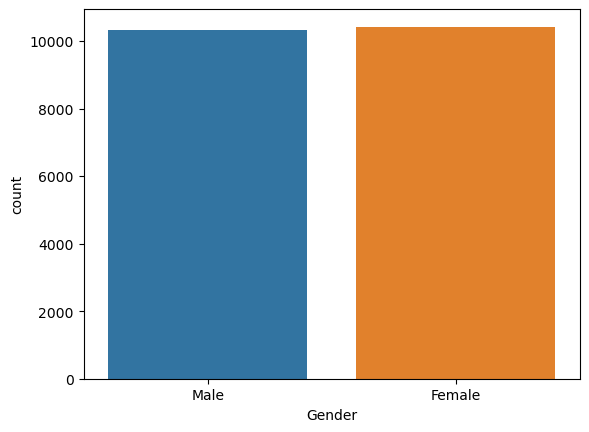

In [4]:
sns.countplot(data=train, x="Gender")
plt.show()

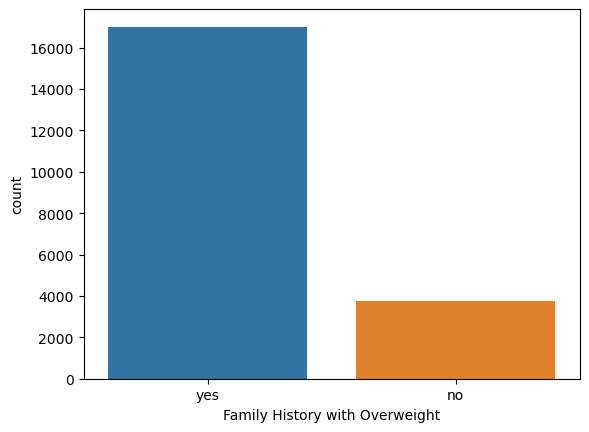

In [5]:
sns.countplot(data=train, x="family_history_with_overweight")
plt.xlabel("Family History with Overweight")
plt.show()

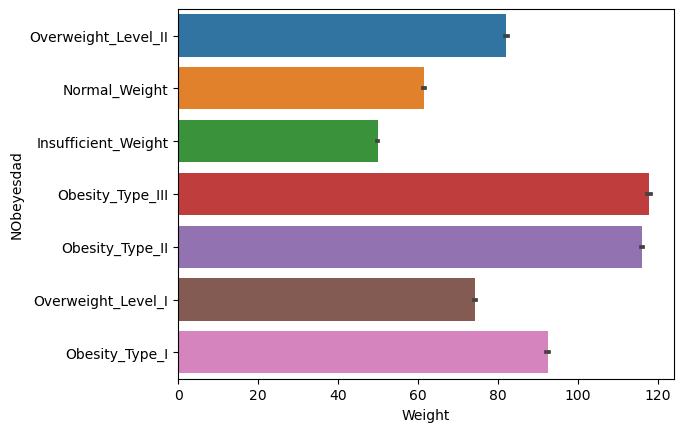

In [6]:
sns.barplot(data=train, x="Weight", y="NObeyesdad")
plt.show()

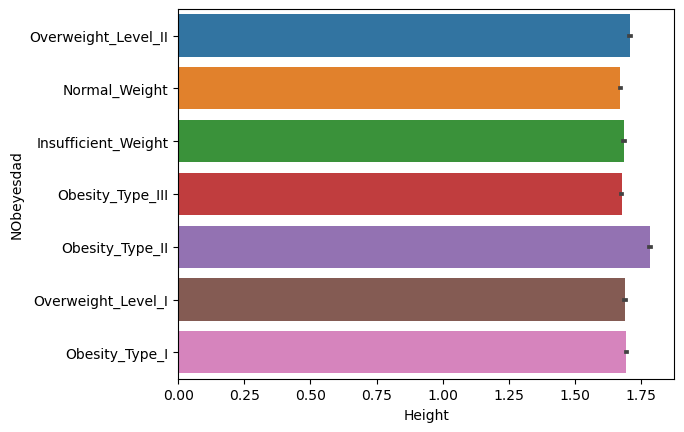

In [7]:
sns.barplot(data=train, x="Height", y="NObeyesdad")
plt.show()

# Exploring the categorical features & their possible values

In [8]:
for col in train:
    if train[col].dtype == "object":
        print(col, "->", train[col].unique())

Gender -> ['Male' 'Female']
family_history_with_overweight -> ['yes' 'no']
FAVC -> ['yes' 'no']
CAEC -> ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE -> ['no' 'yes']
SCC -> ['no' 'yes']
CALC -> ['Sometimes' 'no' 'Frequently']
MTRANS -> ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad -> ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


# Encoding the categorical features

In [9]:
train["SMOKE"] = train["SMOKE"].map({"yes": 1, "no": 0})
train["FAVC"] = train["FAVC"].map({"yes": 1, "no": 0})
train["SCC"] = train["SCC"].map({"yes": 1, "no": 0})
train["family_history_with_overweight"] = train["family_history_with_overweight"].map({"yes": 1, "no": 0})

train["CALC"] = train["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2})
train["CAEC"] = train["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})
train["NObeyesdad"] = train["NObeyesdad"].map({
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Obesity_Type_I": 2,
    "Obesity_Type_II": 3,
    "Obesity_Type_III": 4,
    "Overweight_Level_I": 5,
    "Overweight_Level_II": 6
})

train = pd.get_dummies(train, columns=["Gender", "MTRANS"])

# Split into X & y

In [10]:
X = train.drop("NObeyesdad", axis=1)
y = train["NObeyesdad"]

# Split into training & testing dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

Random Forest - Score:  0.894990366088632


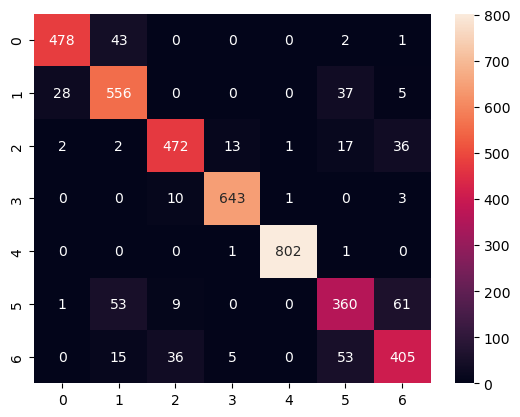

In [12]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
pred_1 = clf.predict(X_test)
score_1 = accuracy_score(y_test, pred_1)
print("Random Forest - Score: ", score_1)
conf_mat = confusion_matrix(y_test, pred_1)
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.show()

# XGBoost

XGBoost - Score:  0.9002890173410405


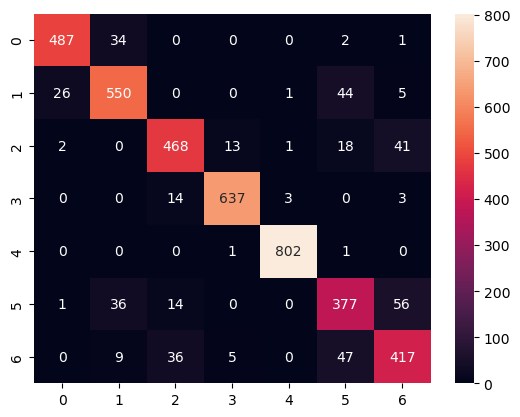

In [13]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
pred_2 = clf.predict(X_test)
score_2 = accuracy_score(y_test, pred_2)
print("XGBoost - Score: ", score_2)
conf_mat = confusion_matrix(y_test, pred_2)
sns.heatmap(conf_mat, annot=True, fmt="d")
plt.show()

## Since XGBoost gives out a slightly better accuracy score
## We will be using XGBoost to train on the entire training dataset

In [14]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X, y) # training on the entire dataset

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

# Working on testing dataset

In [15]:
test = pd.read_csv("./test.csv")
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [16]:
ids = test["id"] # extracting ids for submission
test.drop(columns=["id"], inplace=True)

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

# Encoding categorical features in the testing set

In [18]:
test["SMOKE"] = test["SMOKE"].map({"yes": 1, "no": 0})
test["FAVC"] = test["FAVC"].map({"yes": 1, "no": 0})
test["SCC"] = test["SCC"].map({"yes": 1, "no": 0})
test["family_history_with_overweight"] = test["family_history_with_overweight"].map({"yes": 1, "no": 0})

test["CALC"] = test["CALC"].map({"no": 0, "Sometimes": 1, "Frequently": 2})
test["CAEC"] = test["CAEC"].map({"no": 0, "Sometimes": 1, "Frequently": 2, "Always": 3})

test = pd.get_dummies(test, columns=["Gender", "MTRANS"])

In [19]:
test.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,...,FAF,TUE,CALC,Gender_Female,Gender_Male,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,...,0.855400,0.000000,1.0,False,True,False,False,False,True,False
1,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,...,1.000000,0.000000,1.0,True,False,False,False,False,True,False
2,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,...,0.000000,0.250502,1.0,True,False,False,False,False,True,False
3,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,...,0.094851,0.000000,1.0,False,True,False,False,False,True,False
4,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,...,0.000000,0.741069,1.0,True,False,False,False,False,True,False


In [21]:
pred = clf.predict(test)

# Creating a DataFrame for submission

In [22]:
submission_df = pd.DataFrame({
    "id": ids,
    "NObeyesdad": pred
})

submission_df["NObeyesdad"] = submission_df["NObeyesdad"].map({
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
})

submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


# Saving the submission file

In [23]:
submission_df.to_csv("submission.csv", index=False)